In [2]:
#Natural Language Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('C:/Users/user/Desktop/EXACKT/Dataset/smsspamcollection/SMSSpamCollection',sep='\t',names=['label','msg'])

In [7]:
df.head(3)

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
msg      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [9]:
df.describe()

,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.groupby('label').describe()

msg                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [11]:
df['length']=df['msg'].apply(len)
df.head(3)

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


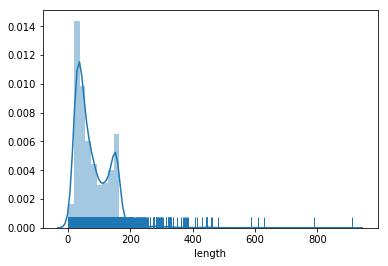

In [12]:
sns.distplot(df['length'],rug=True)

In [13]:
df.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E7E578DA0>,
      dtype=object)

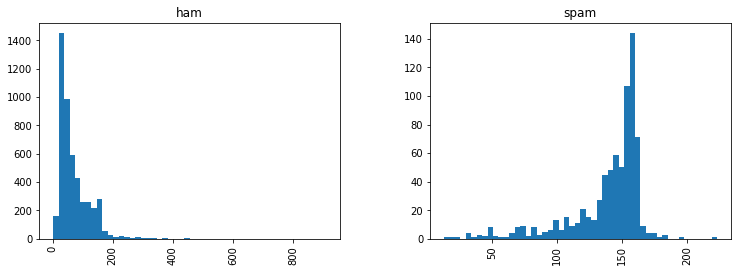

In [14]:
df.hist(column='length',by='label',bins=50,figsize=(12,4))

In [15]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [64]:
t=df['msg'][10]

In [65]:
t

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [66]:
from string import punctuation as punc

In [67]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
t1=''.join([i for i in t if i not in punc])
t1

'Im gonna be home soon and i dont want to talk about this stuff anymore tonight k Ive cried enough today'

In [69]:
#import nltk
#nltk.download('stopwords')

In [70]:
from nltk.corpus import stopwords as sw

In [71]:
sw.words('english')[:]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [80]:
def text_process(t):
    t=' '.join([i for i in t.split() if i.lower() not in sw.words('english')])
    t=''.join([i for i in t.split() if i not in punc])
    return [i for i in t.split() if i.lower() not in sw.words('english')]

In [87]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import BernoulliNB

In [82]:
pipe=Pipeline([
    ('cv',CountVectorizer(analyzer=text_process))
    ,
    ('tfidf',TfidfTransformer())
    ,
    ('model',MultinomialNB())
    ,
])

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['msg'],df['label'],test_size=0.3,random_state=101)

In [84]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x0000023E000C16A8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [85]:
pred=pipe.predict(x_test)

In [86]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         ham       0.88      1.00      0.94      1475
        spam       0.00      0.00      0.00       197

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.44      0.50      0.47      1672
weighted avg       0.78      0.88      0.83      1672

[[1475    0]
 [ 197    0]]


In [88]:
pipe=Pipeline([
    ('cv',CountVectorizer(analyzer=text_process))
    ,
    ('tfidf',TfidfTransformer())
    ,
    ('model',BernoulliNB())
    ,
])

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['msg'],df['label'],test_size=0.3,random_state=101)

In [90]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x0000023E000C16A8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor..., use_idf=True)), ('model', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])

In [91]:
pred=pipe.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         ham       0.88      1.00      0.94      1475
        spam       0.00      0.00      0.00       197

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.44      0.50      0.47      1672
weighted avg       0.78      0.88      0.83      1672

[[1475    0]
 [ 197    0]]


In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
pipe=Pipeline([
    ('cv',CountVectorizer(analyzer=text_process))
    ,
    ('tfidf',TfidfTransformer())
    ,
    ('model',RandomForestClassifier())
    ,
])

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['msg'],df['label'],test_size=0.3,random_state=101)

In [95]:
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1475
        spam       1.00      0.15      0.26       197

   micro avg       0.90      0.90      0.90      1672
   macro avg       0.95      0.58      0.61      1672
weighted avg       0.91      0.90      0.87      1672

[[1475    0]
 [ 167   30]]


In [101]:
dd=pd.read_csv(r'C:\Users\user\Desktop\EXACKT\Dataset\yelp.csv')

In [102]:
dd.head(2).T

,0,1
business_id,9yKzy9PApeiPPOUJEtnvkg,ZRJwVLyzEJq1VAihDhYiow
date,2011-01-26,2011-07-27
review_id,fWKvX83p0-ka4JS3dc6E5A,IjZ33sJrzXqU-0X6U8NwyA
stars,5,5
text,My wife took me here on my birthday for breakf...,I have no idea why some people give bad review...
type,review,review
user_id,rLtl8ZkDX5vH5nAx9C3q5Q,0a2KyEL0d3Yb1V6aivbIuQ
cool,2,0
useful,5,0
funny,0,0


In [103]:
dd.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [104]:
dd['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [105]:
#recommendation systems

In [2]:
df=pd.read_csv(r'C:\Users\user\Desktop\EXACKT\Dataset\u.data',sep='\t',names=['uid','item_id','rate','ts'])
df.head(2)

,uid,item_id,rate,ts
0,0,50,5,881250949
1,0,172,5,881250949


In [3]:
mtitles=pd.read_csv(r'C:\Users\user\Desktop\EXACKT\Dataset\Movie_Id_Titles')
mtitles.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [4]:
df=pd.merge(df,mtitles,on='item_id')

In [5]:
df.head()

,uid,item_id,rate,ts,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
len(df.title[(df['rate']==5)].unique())

1163

In [7]:
df['title'][0]

'Star Wars (1977)'

In [8]:
sum(df['title']=='Star Wars (1977)')

584

In [9]:
df

,uid,item_id,rate,ts,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [10]:
df.groupby('title').mean()

,uid,item_id,rate,ts
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
2 Days in the Valley (1996),473.559140,1011.0,3.225806,8.834569e+08
"20,000 Leagues Under the Sea (1954)",476.125000,141.0,3.500000,8.830089e+08
2001: A Space Odyssey (1968),460.965251,135.0,3.969112,8.828325e+08
3 Ninjas: High Noon At Mega Mountain (1998),273.400000,314.0,1.000000,8.869247e+08


In [11]:
sum(df.groupby('title')['rate'].mean()==5.0)

10

In [12]:
df.groupby('title')['rate'].mean().sort_values(ascending=False).head(4)

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Name: rate, dtype: float64

In [13]:
df.groupby('title')['rate'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rate, dtype: int64

In [14]:
rates=pd.DataFrame(df.groupby('title')['rate'].mean())
rates.head()

,rate
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [15]:
rates['numRate']=pd.DataFrame(df.groupby('title')['rate'].count())

In [139]:
rates.head(20)

,rate,numRate
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [16]:
rates.sort_values(by='numRate',ascending=False)

,rate,numRate
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


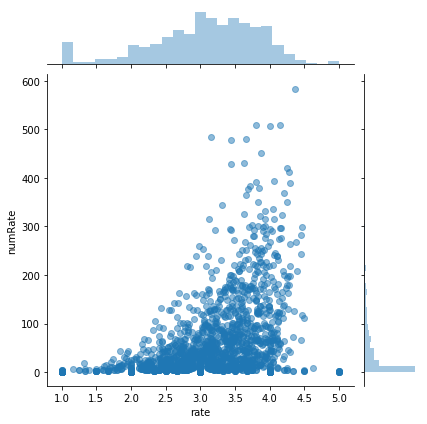

In [17]:
sns.jointplot(x='rate',y='numRate',data=rates,alpha=0.5)

In [18]:
moviemat=df.pivot_table(index='uid',columns='title',values='rate')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
uid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
swur=moviemat['Star Wars (1977)']
swur.head()

uid
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [20]:
sim_sw=moviemat.corrwith(swur)

In [21]:
#sim_sw

In [22]:
corr_sw=pd.DataFrame(sim_sw,columns=['Correlation'])
corr_sw.dropna(inplace=True)
corr_sw.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [23]:
corr_sw.sort_values('Correlation',ascending=False).head(5)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [24]:
corr_sw=corr_sw.join(rates['numRate'])
corr_sw.head()

,Correlation,numRate
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [27]:
abcdefg=corr_sw[corr_sw['numRate']>100].sort_values(by='Correlation',ascending=False)

In [28]:
abcdefg

,Correlation,numRate
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


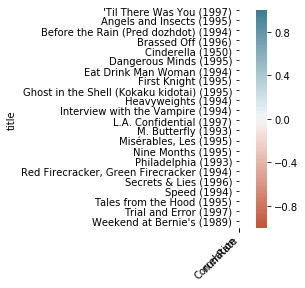

In [32]:
ax = sns.heatmap(
    corr_sw, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);